In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
%matplotlib inline \traning_set

In [6]:
batch_size=256
image_size=(128, 128)

# Набор данных для обучения

In [38]:
train_dataset = image_dataset_from_directory('./traning_set',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")

Found 6330 files belonging to 211 classes.
Using 5697 files for training.


# Набор данных для валидации

In [39]:
validation_dataset = image_dataset_from_directory('./traning_set',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")

Found 6330 files belonging to 211 classes.
Using 633 files for validation.


In [40]:
class_names = train_dataset.class_names
class_names

['AN21',
 'AN211',
 'AN22',
 'AN221',
 'AN222',
 'AN31',
 'AN311',
 'AN32',
 'AN321',
 'AN33',
 'AND2',
 'AND3',
 'AND4',
 'AND5',
 'AND6',
 'ANTENNACELLN2',
 'ANTENNACELLNP2',
 'ANTENNACELLP2',
 'AO21',
 'AO211',
 'AO22',
 'AO221',
 'AO222',
 'AO31',
 'AO311',
 'AO32',
 'AO321',
 'AO33',
 'BTH',
 'BTL',
 'BU',
 'CAG',
 'CLKVBUF',
 'DECAP3',
 'DFF',
 'DFFQ',
 'DFFR',
 'DFFRQ',
 'DFFRS',
 'DFFRSQ',
 'DFFS',
 'DFFSQ',
 'DFR',
 'DFR2',
 'DFR4',
 'DFR8',
 'DFRQ',
 'DFRQ2',
 'DFRQ4',
 'DFRQ8',
 'DFRR',
 'DFRR2',
 'DFRR4',
 'DFRR8',
 'DFRRQ',
 'DFRRQ2',
 'DFRRQ4',
 'DFRRQ8',
 'DFRRS',
 'DFRRSQ',
 'DFRS',
 'DFRSQ',
 'DLH',
 'DLHQ',
 'DLHR',
 'DLHRQ',
 'DLHRS',
 'DLHRSQ',
 'DLHRT',
 'DLHS',
 'DLHSQ',
 'DLHST',
 'DLHT',
 'DLL',
 'DLLQ',
 'DLLR',
 'DLLRQ',
 'DLLRS',
 'DLLRSQ',
 'DLLRT',
 'DLLRT2',
 'DLLRT4',
 'DLLRT8',
 'DLLS',
 'DLLSQ',
 'DLLST',
 'DLLT',
 'DLLT2',
 'DLLT4',
 'DLLT8',
 'EN2',
 'EN3',
 'EO2',
 'EO3',
 'FA',
 'FCNE',
 'FEED',
 'HA',
 'IN',
 'ITH',
 'ITL',
 'LGCN',
 'LGCP',
 'LOGI

In [42]:
test_dataset = image_dataset_from_directory('./test_set',
                                             batch_size=batch_size,
                                             image_size=image_size,
                                             color_mode="grayscale")

Found 636 files belonging to 211 classes.


In [13]:
test_dataset.class_names

['AN21',
 'AN211',
 'AN22',
 'AN221',
 'AN222',
 'AN31',
 'AN311',
 'AN32',
 'AN321',
 'AN33',
 'AND2',
 'AND3',
 'AND4',
 'AND5',
 'AND6',
 'ANTENNACELLN2',
 'ANTENNACELLNP2',
 'ANTENNACELLP2',
 'AO21',
 'AO211',
 'AO22',
 'AO221',
 'AO222',
 'AO31',
 'AO311',
 'AO32',
 'AO321',
 'AO33',
 'BTH',
 'BTL',
 'BU',
 'CAG',
 'CLKVBUF',
 'DECAP3',
 'DFF',
 'DFFQ',
 'DFFR',
 'DFFRQ',
 'DFFRS',
 'DFFRSQ',
 'DFFS',
 'DFFSQ',
 'DFR',
 'DFR2',
 'DFR4',
 'DFR8',
 'DFRQ',
 'DFRQ2',
 'DFRQ4',
 'DFRQ8',
 'DFRR',
 'DFRR2',
 'DFRR4',
 'DFRR8',
 'DFRRQ',
 'DFRRQ2',
 'DFRRQ4',
 'DFRRQ8',
 'DFRRS',
 'DFRRSQ',
 'DFRS',
 'DFRSQ',
 'DLH',
 'DLHQ',
 'DLHR',
 'DLHRQ',
 'DLHRS',
 'DLHRSQ',
 'DLHRT',
 'DLHS',
 'DLHSQ',
 'DLHST',
 'DLHT',
 'DLL',
 'DLLQ',
 'DLLR',
 'DLLRQ',
 'DLLRS',
 'DLLRSQ',
 'DLLRT',
 'DLLRT2',
 'DLLRT4',
 'DLLRT8',
 'DLLS',
 'DLLSQ',
 'DLLST',
 'DLLT',
 'DLLT2',
 'DLLT4',
 'DLLT8',
 'EN2',
 'EN3',
 'EO2',
 'EO3',
 'FA',
 'FCNE',
 'FEED',
 'HA',
 'IN',
 'ITH',
 'ITL',
 'LGCN',
 'LGCP',
 'LOGI

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [43]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(128, 128, 1), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 211 нейрон по количеству классов
model.add(Dense(211, activation='softmax'))

In [44]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [45]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=7,
                    verbose=2)

Epoch 1/7
23/23 - 215s - loss: 8.8208 - accuracy: 0.0139 - val_loss: 5.0895 - val_accuracy: 0.0474 - 215s/epoch - 9s/step
Epoch 2/7
23/23 - 216s - loss: 4.3529 - accuracy: 0.1116 - val_loss: 2.5326 - val_accuracy: 0.4028 - 216s/epoch - 9s/step
Epoch 3/7
23/23 - 206s - loss: 1.9757 - accuracy: 0.4727 - val_loss: 0.7493 - val_accuracy: 0.7520 - 206s/epoch - 9s/step
Epoch 4/7
23/23 - 207s - loss: 0.7972 - accuracy: 0.7376 - val_loss: 0.2198 - val_accuracy: 0.9210 - 207s/epoch - 9s/step
Epoch 5/7
23/23 - 216s - loss: 0.3339 - accuracy: 0.8894 - val_loss: 0.0637 - val_accuracy: 0.9779 - 216s/epoch - 9s/step
Epoch 6/7
23/23 - 214s - loss: 0.1620 - accuracy: 0.9430 - val_loss: 0.0433 - val_accuracy: 0.9874 - 214s/epoch - 9s/step
Epoch 7/7
23/23 - 208s - loss: 0.1000 - accuracy: 0.9663 - val_loss: 0.0364 - val_accuracy: 0.9826 - 208s/epoch - 9s/step


In [46]:
scores = model.evaluate(test_dataset, verbose=1)

3/3 [==============================] - 6s 2s/step - loss: 0.0483 - accuracy: 0.9796


In [47]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 97.956


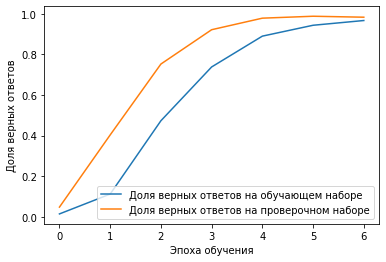

In [48]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

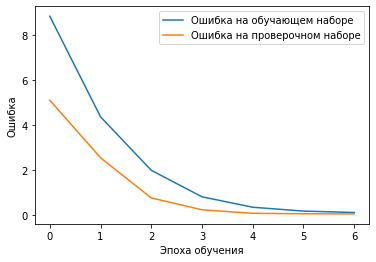

In [49]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [50]:
model.save("Symbol_Check_model_7.h5")